# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [2]:
# Code Here
!pip install palmerpenguins
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from palmerpenguins import load_penguins
penguins = load_penguins()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [8]:
# dummify species, island, and sex
penguins = pd.get_dummies(penguins, drop_first=True)
penguins = penguins.dropna()
penguins = penguins.astype(int)
penguins.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male
0,39,18,181,3750,2007,1,0,0,0,0,1,0,1
1,39,17,186,3800,2007,1,0,0,0,0,1,1,0
2,40,18,195,3250,2007,1,0,0,0,0,1,1,0
4,36,19,193,3450,2007,1,0,0,0,0,1,1,0
5,39,20,190,3650,2007,1,0,0,0,0,1,0,1


Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on a training dataset subset of the entire dataset:

* Four different models, each containing a different set of predictor variables

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [14]:
y_train = penguins["bill_depth_mm"]
X_train = penguins.drop(columns=["bill_depth_mm"])
X_train, X_test, y_train, y_test = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42)

models = {
    "Model 1": ["bill_length_mm"],
    "Model 2": ["bill_length_mm", "flipper_length_mm"],
    "Model 3": ["bill_length_mm", "flipper_length_mm", "body_mass_g"],
    "Model 4": [
        "bill_length_mm", "flipper_length_mm", "body_mass_g", "year",
        "species_Adelie", "species_Chinstrap", "species_Gentoo",
        "island_Biscoe", "island_Dream", "island_Torgersen", "sex_male"]}

rows = []
for name, cols in models.items():
    model = LinearRegression()
    model.fit(X_train[cols], y_train)
    y_pred = model.predict(X_train[cols])
    X_train[f"{name}_predict"] = y_pred
    rmse = np.sqrt(mean_squared_error(y_train, y_pred))
    r2 = r2_score(y_train, y_pred)
    rows.append({
        "Model": name,
        "Train RMSE": rmse,
        "Train R²": r2})

train_results = pd.DataFrame(rows)
train_results




,Model,Train RMSE,Train R²
0,Model 1,1.921555,0.050182
1,Model 2,1.603189,0.338843
2,Model 3,1.599768,0.341662
3,Model 4,0.835065,0.820620


In [26]:
df_long = X_train[["bill_length_mm", "Model 1_predict", "Model 2_predict",
                   "Model 3_predict", "Model 4_predict"]].copy()
df_long["bill_depth_mm"] = y_train

df_long = df_long.melt(
    id_vars=["bill_length_mm", "bill_depth_mm"],
    value_name="bill_depth_mm_predicted",
    var_name="type")

df_long.head()

,bill_length_mm,bill_depth_mm,type,bill_depth_mm_predicted
0,42,18,Model 1_predict,16.804463
1,34,18,Model 1_predict,17.441776
2,37,16,Model 1_predict,17.202784
3,50,18,Model 1_predict,16.167149
4,40,16,Model 1_predict,16.963791


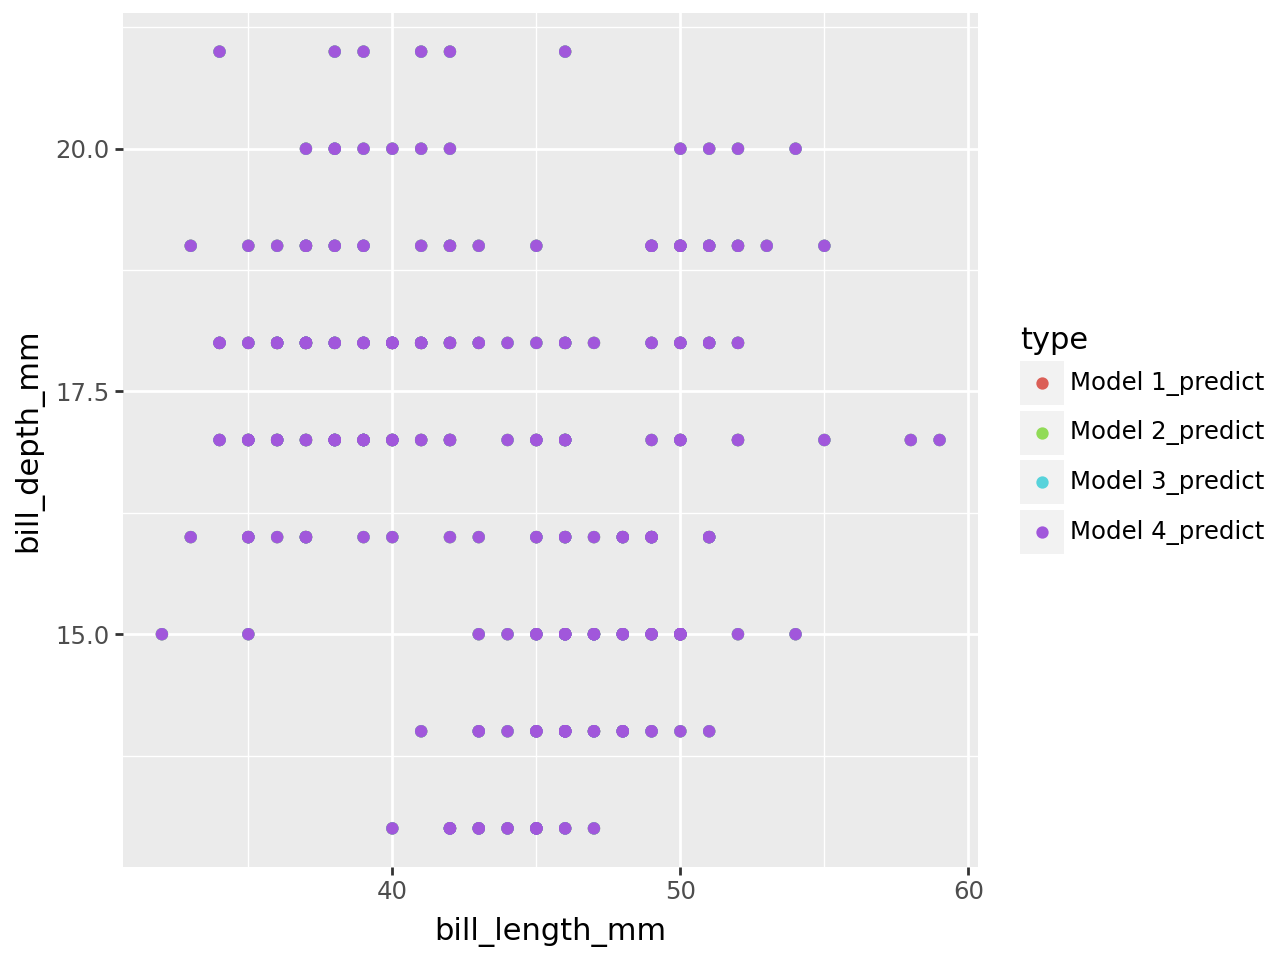

In [27]:
from plotnine import *

(ggplot(df_long,
        aes(x = "bill_length_mm",
            y = "bill_depth_mm",
            color = "type")) +
 geom_point())